In [2]:
import numpy as np
import pylab
import copy
from qiskit import BasicAer
from qiskit.opflow import I, X, Y, Z
import scipy as sp


In [3]:
num_qubits = 4

hamiltonian = (Z ^ Z) ^ (I ^ (num_qubits-2))

target_energy = -1.0

iterations = 100

/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/circuit/tools/pi_check.py:55: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  syms = expr.expr_free_symbols


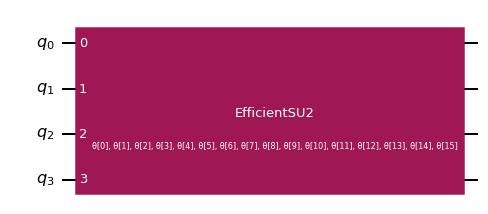

In [4]:
#psi(theta) = U^(theta) |0>
#Using Efficinet SU2 from Qiskit

from qiskit.circuit.library import EfficientSU2

#randomly chosen initial rotation gates
ansatz = EfficientSU2(num_qubits, reps=1, entanglement='linear', insert_barriers=True)
ansatz.draw('mpl', style='iqx',)

In [5]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA #classical optimizer

optimizer = SPSA(maxiter=iterations)

np.random.seed(15)
initial_point = np.random.random(ansatz.num_parameters)
#random initial eigenvalue guess generation

In [6]:
#intermediate info
intermediate_info = {'nfev': [], 'parameters': [], 'energy': [], 'std': []}

def callback(nfev,parameters,energy,std):
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['std'].append(std)

In [7]:
#LOCAL SIMULATION

from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit.algorithms import VQE

#clear intermediate info
intermediate_info = {'nfev': [], 'parameters': [], 'energy': [], 'std': []}


local_vqe = VQE(ansatz=ansatz,
                optimizer=optimizer,
                initial_point=initial_point,
                quantum_instance=QasmSimulatorPy(),
                callback=callback)

/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/circuit/tools/pi_check.py:55: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  syms = expr.expr_free_symbols


In [8]:
local_result = local_vqe.compute_minimum_eigenvalue(hamiltonian)

print('Eigenvalue:', local_result.eigenvalue)
print('Target:', target_energy)

/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/utils/run_circuits.py:695: UserWarning: Option max_credits is not used by this backend
  return backend.run(circuits, **run_kwargs)


Eigenvalue: (-1+0j)
Target: -1.0


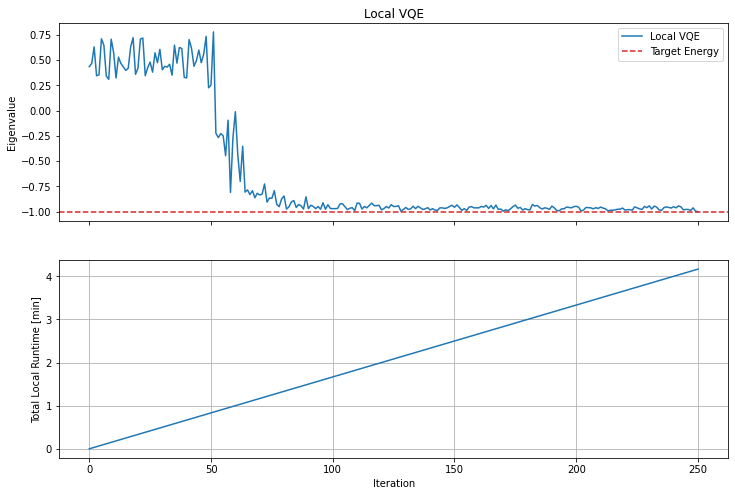

In [9]:
import matplotlib.pyplot as plt

#local results plotting

loss = intermediate_info['energy']
timestamps = intermediate_info['nfev']

runtimes = np.concatenate(([0], np.diff(timestamps)))
runtimes_min = runtimes / 60


fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,8),sharex=True)

#loss and reference value
ax1.plot(loss,label= 'Local VQE')
ax1.axhline(y=target_energy, color='tab:red', linestyle='--', label='Target Energy')

ax2.plot(np.cumsum(runtimes_min))

#settings
ax1.set_title('Local VQE')
ax1.set_ylabel('Eigenvalue')
ax1.legend(loc='best')
ax2.set_ylabel('Total Local Runtime [min]')
ax2.set_xlabel('Iteration')
ax2.grid()

